In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
selected_features = df.drop(columns=["koi_disposition"])
# Drop the null columns where all values are null
selected_features = selected_features.dropna(axis='columns', how='all')
# Drop the null rows
selected_features = selected_features.dropna()

# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(selected_features)
y = df["koi_disposition"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [5]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Select feature using PCA

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
pca.fit(X_train_scaled)

PCA(n_components=40)

In [7]:
sum(pca.explained_variance_ratio_[0:8])

0.9061280563873516

In [8]:
x_train_pca = pca.transform(X_train_scaled)
x_train_pca = pd.DataFrame(x_train_pca).iloc[:,0:8]
x_train_pca.head()

,0,1,2,3,4,5,6,7
0,-0.263102,-0.068232,-0.201933,-0.078637,-0.278249,-0.194584,-0.007799,-0.020546
1,0.710269,-0.307681,0.188668,0.896526,-0.241228,0.154469,0.056782,-0.097658
2,-0.467565,0.429338,0.636504,-0.109988,-0.251075,-0.186344,-0.183437,-0.086606
3,-0.289809,-0.082121,-0.244322,-0.017932,-0.224228,-0.023160,-0.001677,-0.163039
4,-0.305630,-0.100815,-0.251848,0.065897,0.275597,-0.015271,-0.042849,-0.060282


In [9]:
x_test_pca = pca.transform(X_test_scaled)
x_test_pca = pd.DataFrame(x_test_pca).iloc[:,0:8]
x_test_pca.head()

,0,1,2,3,4,5,6,7
0,-0.519718,0.412618,0.562691,0.012535,0.362167,-0.076959,-0.069938,-0.303366
1,-0.290978,-0.070163,-0.212309,-0.022155,0.219063,-0.256214,0.115914,-0.085510
2,0.312648,0.389871,-0.435807,-0.413982,0.540804,0.272247,-0.010757,-0.104048
3,0.355260,-0.728538,0.363024,-0.030162,-0.369393,-0.047567,-0.086808,0.065639
4,1.393228,0.201086,0.075923,0.221277,-0.055393,-0.194947,0.034387,0.062402


# Train the Model


In [10]:
from sklearn.svm import SVC

SVM_pca = SVC(kernel='linear')
SVM_pca.fit(x_train_pca, np.ravel(y_train,order='C'))

SVC(kernel='linear')

# Performance Matrix

In [11]:
print(f"Training Data Score: {SVM_pca.score(x_train_pca, y_train)}")
print(f"Test Data Score: {SVM_pca.score(x_test_pca, y_test)}")


Training Data Score: 0.8045012397482357
Test Data Score: 0.8037757437070938


In [12]:
from sklearn.metrics import classification_report

# Predicted outcomes
predictions = SVM_pca.predict(x_test_pca)
print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.66      0.40      0.50       411
     CONFIRMED       0.62      0.81      0.70       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.80      1748
     macro avg       0.75      0.73      0.73      1748
  weighted avg       0.80      0.80      0.79      1748



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1,5,10,50],
            'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(SVM_pca, param_grid, verbose=3)

In [14]:
# Train the model with GridSearch
grid.fit(x_train_pca, np.ravel(y_train,order='C'))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................C=1, gamma=0.0001;, score=0.811 total time=   0.4s
[CV 2/5] END .................C=1, gamma=0.0001;, score=0.820 total time=   0.4s
[CV 3/5] END .................C=1, gamma=0.0001;, score=0.806 total time=   0.4s
[CV 4/5] END .................C=1, gamma=0.0001;, score=0.800 total time=   0.4s
[CV 5/5] END .................C=1, gamma=0.0001;, score=0.790 total time=   0.4s
[CV 1/5] END .................C=1, gamma=0.0005;, score=0.811 total time=   0.4s
[CV 2/5] END .................C=1, gamma=0.0005;, score=0.820 total time=   0.5s
[CV 3/5] END .................C=1, gamma=0.0005;, score=0.806 total time=   0.4s
[CV 4/5] END .................C=1, gamma=0.0005;, score=0.800 total time=   0.4s
[CV 5/5] END .................C=1, gamma=0.0005;, score=0.790 total time=   0.4s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.811 total time=   0.4s
[CV 2/5] END ..................C=1, gamma=0.001;

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [15]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001}
0.805640777476186


In [16]:
SVM_pca_gridsearch = SVC(kernel='linear',C=50,gamma=0.0001)
SVM_pca_gridsearch.fit(x_train_pca, np.ravel(y_train,order='C'))

SVC(C=50, gamma=0.0001, kernel='linear')

# Performance Matrix

In [17]:
print(f"Training Data Score: {SVM_pca_gridsearch.score(x_train_pca, y_train)}")
print(f"Testing Data Score: {SVM_pca_gridsearch.score(x_test_pca, y_test)}")

Training Data Score: 0.8058363532328819
Testing Data Score: 0.8072082379862701


                precision    recall  f1-score      support
CANDIDATE        0.660377  0.425791  0.517751   411.000000
CONFIRMED        0.626016  0.795455  0.700637   484.000000
FALSE POSITIVE   0.980415  0.997655  0.988960   853.000000
accuracy         0.807208  0.807208  0.807208     0.807208
macro avg        0.755603  0.739634  0.735783  1748.000000
weighted avg     0.807037  0.807208  0.798333  1748.000000
Stored 'report_SVM_minmax_df' (DataFrame)


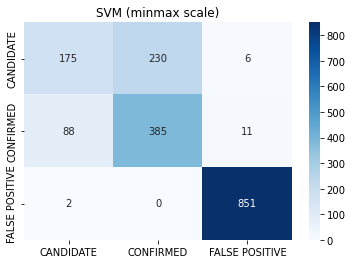

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

# Predicted outcomes
predictions = SVM_pca_gridsearch.predict(x_test_pca)
target = ['CANDIDATE','CONFIRMED','FALSE POSITIVE']

ax= plt.subplot()
cm = (confusion_matrix(y_test,predictions))
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='g')

# labels, title and ticks
ax.set_title('SVM (minmax scale)')
ax.xaxis.set_ticklabels(target)
ax.yaxis.set_ticklabels(target)


report_SVM_minmax = classification_report(y_test,predictions, output_dict=True)
report_SVM_minmax_df = pd.DataFrame(report_SVM_minmax).transpose()
print(report_SVM_minmax_df)
%store report_SVM_minmax_df 

In [19]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'SVM_pca_gridsearch_minmaxscaler.sav'
joblib.dump(SVM_pca_gridsearch, filename)

['SVM_pca_gridsearch_minmaxscaler.sav']